In [1]:
# This file is created to analyse dune volumes using the JARKUS analysis toolbox

import yaml
import pickle
from JAT.Jarkus_Analysis_Toolbox import Transects, Extraction

######################
# LOAD SETTINGS FROM FILE
######################
config = yaml.safe_load(open("./DuneVolumS_Transect.yml"))


In [ ]:
#%%###################
# LOAD DATA
######################
# Load jarkus dataset
data = Transects(config)

# To view the metadata:
# print(data.dataset)
# print(data.variables)

#%%
# The following step makes sure the requested years and transects are available in the dataset.
data.get_availability(config)

# Those that were available are saved as follows: 
print(data.transects_filtered)
print(data.years_filtered)
# Note that only the years from 1980 onwards are available for this specific transect!

#%%###################
# SAVE + PLOT DATA
######################
# Save elevation dataframes for the available transects
# data.save_elevation_dataframes(config)

# to reopen pickle file with elevation:
# transect = str(config['transects']['single'])
# elevation = pickle.load(open(config['outputdir'] + config['save locations']['DirA'] + transect + '_elevation' + '.pickle','rb'))    

#%%
# Create elevation plots for the available transects - saved as png and pickle
data.get_transect_plot_dunes(config)

# to reopen pickle file with figure:
# figx = pickle.load(open(config['outputdir'] + config['save locations']['DirB'] + 'Transect_' + transect + '.fig.pickle','rb'))    
# figx.show()
    

[ 1000325  1000350  1000375 ... 17001450 17001467 17001487]
[1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


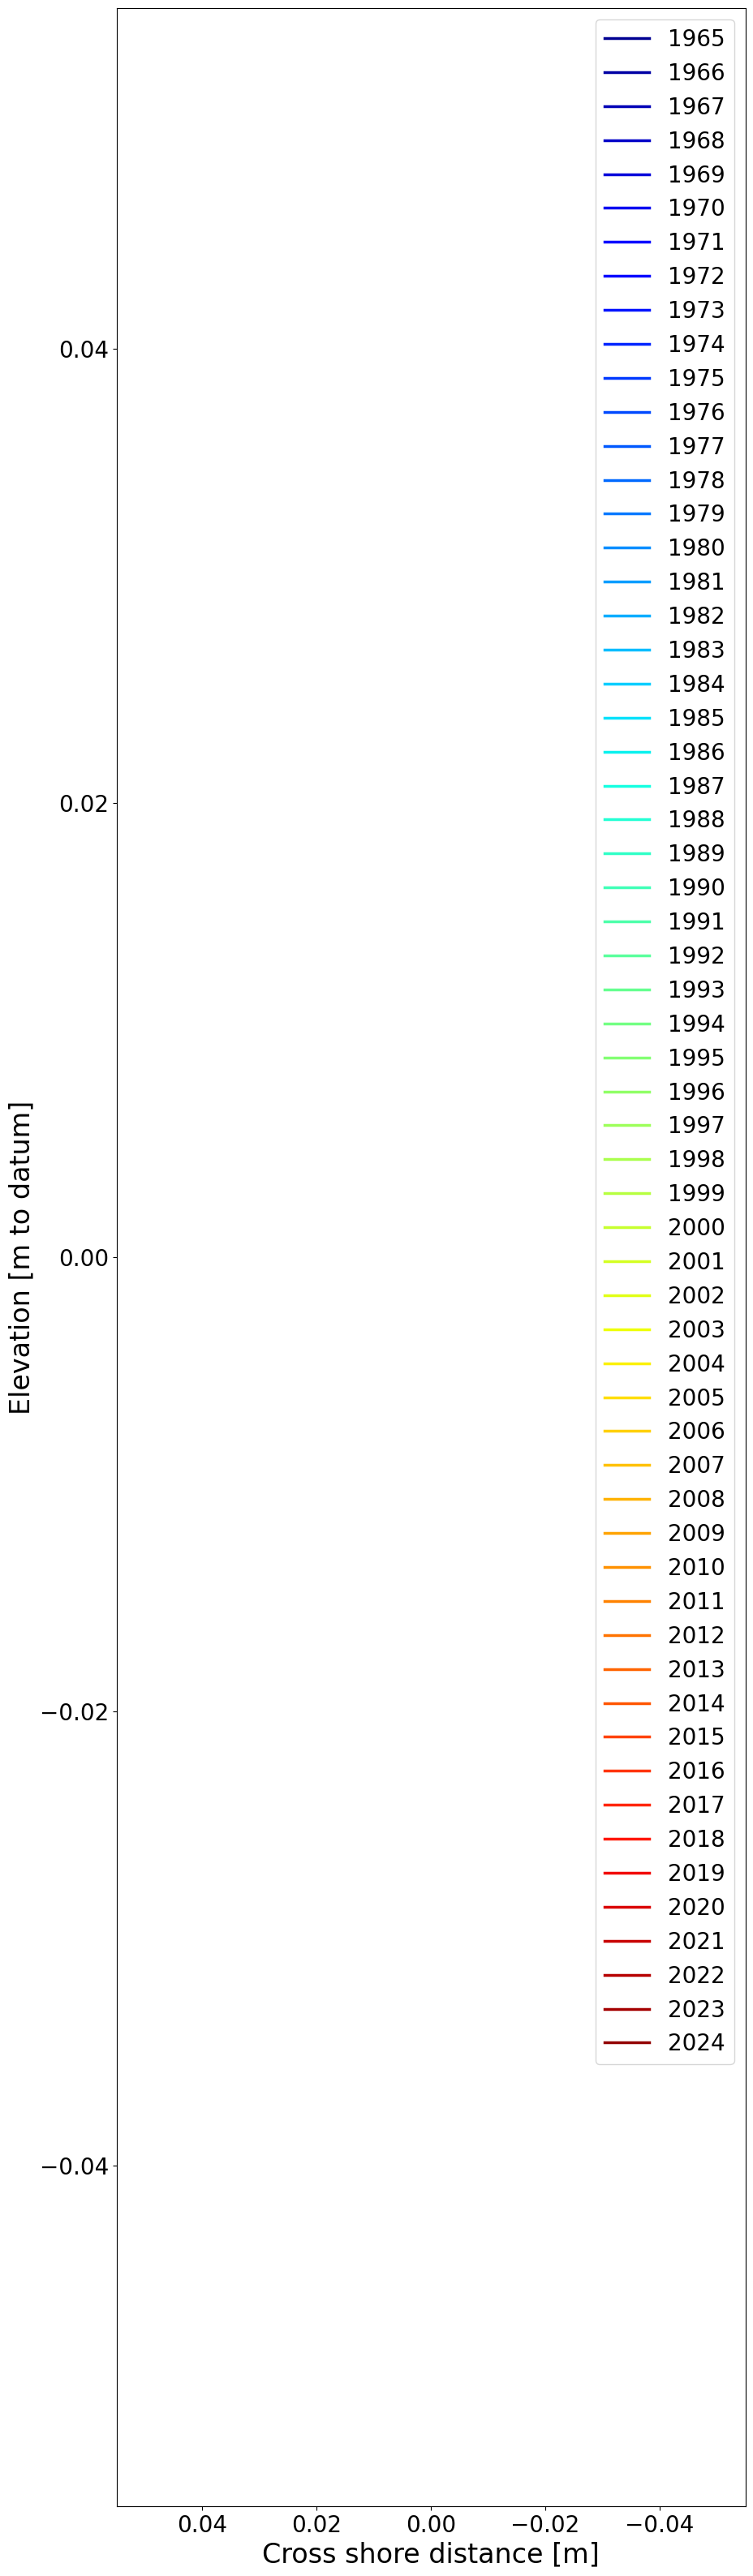

In [ ]:
# this cell creates a legend for the plots
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

# Set figure layout
fig = plt.figure(figsize=(10, 40))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=1964, vmax=2025)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet)

# Load and plot data per year
for yr in range(1965, 2025):
    colorVal = scalarMap.to_rgba(yr)
    plt.plot(0, 0, color=colorVal, label=str(yr), linewidth=2.5)

# Add legend
ax.legend(loc='upper right', ncol=1, fontsize=20)